<a href="https://colab.research.google.com/github/ASHOK1815/ASHOK1815/blob/master/FashionMnist%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [19]:
train = pd.read_csv('/content/drive/MyDrive/Newproject/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Newproject/test.csv')

In [20]:
Y_train = train['label'] 

In [21]:
X_train = train.drop(labels = ["label"],axis = 1)

In [22]:
X_train = X_train / 255.0
test = test / 255.0

In [23]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [24]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [25]:
random_seed = 2

In [26]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

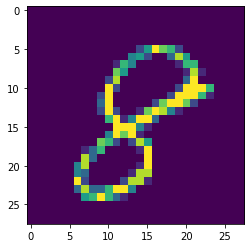

In [27]:
g = plt.imshow(X_train[0][:,:,0])

In [28]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)),
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation = "relu"),
    Dropout(0.5),
    Dense(10, activation = "softmax")
])

In [29]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [30]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [31]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [32]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [33]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [ ]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
439/439 - 274s - loss: 0.4254 - accuracy: 0.8634 - val_loss: 0.0655 - val_accuracy: 0.9793
Epoch 2/30
439/439 - 271s - loss: 0.1282 - accuracy: 0.9615 - val_loss: 0.0515 - val_accuracy: 0.9871
Epoch 3/30


In [ ]:
model.save('mnist.h5')

In [ ]:
results = model.predict(test)

In [ ]:
results = np.argmax(results,axis = 1)

In [ ]:
results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [ ]:
submission.to_csv("cnn_mnist_datagen.csv",index=False)